# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [43]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


filename = "Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

data.head()


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

In [44]:
print 'The data set contains: %r rows and %r columns' % (data.shape[0],data.shape[1])

The data set contains: 985 rows and 12 columns


In [45]:
data.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [46]:
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [57]:
categorical = data.dtypes[data.dtypes == "object"].index
print(categorical)

data[categorical].describe()

Index([u'street', u'city', u'state', u'type', u'sale_date'], dtype='object')


,street,city,state,type,sale_date
count,985,985,985,985,985
unique,981,39,1,4,5
top,4734 14TH AVE,SACRAMENTO,CA,Residential,Mon May 19 00:00:00 EDT 2008
freq,2,439,985,917,268


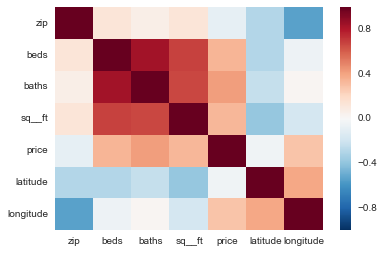

In [48]:
sns.heatmap(data.corr())

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

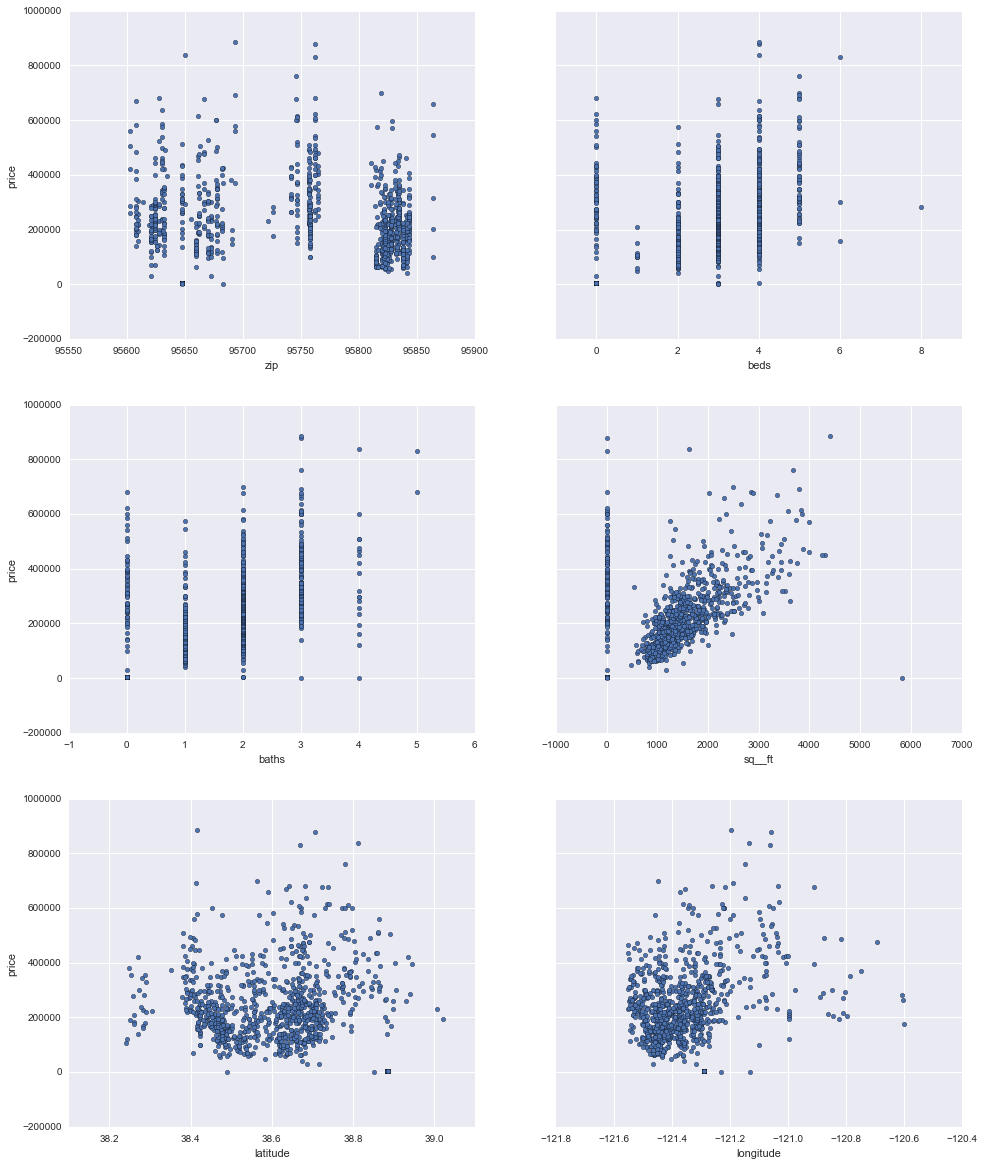

In [49]:
fig, axs = plt.subplots(3, 2, sharey=True, figsize= (16,20))
data.plot.scatter(x= 'zip', y= "price", ax=axs[0,0])
data.plot.scatter(x= 'beds', y= "price", ax=axs[0,1])
data.plot.scatter(x= 'baths', y= "price", ax=axs[1,0])
data.plot.scatter(x= 'sq__ft', y= "price", ax=axs[1,1])
data.plot.scatter(x= 'latitude', y= "price", ax=axs[2,0])
data.plot.scatter(x= 'longitude', y= "price", ax=axs[2,1])



In [59]:
top = data['city'].value_counts()
print top

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
AUBURN               5
WILTON               5
ELVERTA              4
GOLD RIVER           4
RANCHO MURIETA       3
GRANITE BAY          3
WEST SACRAMENTO      3
POLLOCK PINES        3
EL DORADO            2
LOOMIS               2
MEADOW VISTA         1
SLOUGHHOUSE          1
WALNUT GROVE         1
PENRYN               1
MATHER               1
COOL                 1
SHINGLE SPRINGS      1
FORESTHILL           1
DIAMOND SPRINGS      1
GARDEN VALLEY        1
GREENWOOD            1
Name: city, dtype: int64


In [ ]:
data['city2'] = np.select([data.city == 'Sacramento', data.city == 'Elk Grove', data.city == 'Lincoln', data.city == 'Roseville'],
                         ['Sacramento','Elk Grove','Lincoln','Roseville'],'Others')

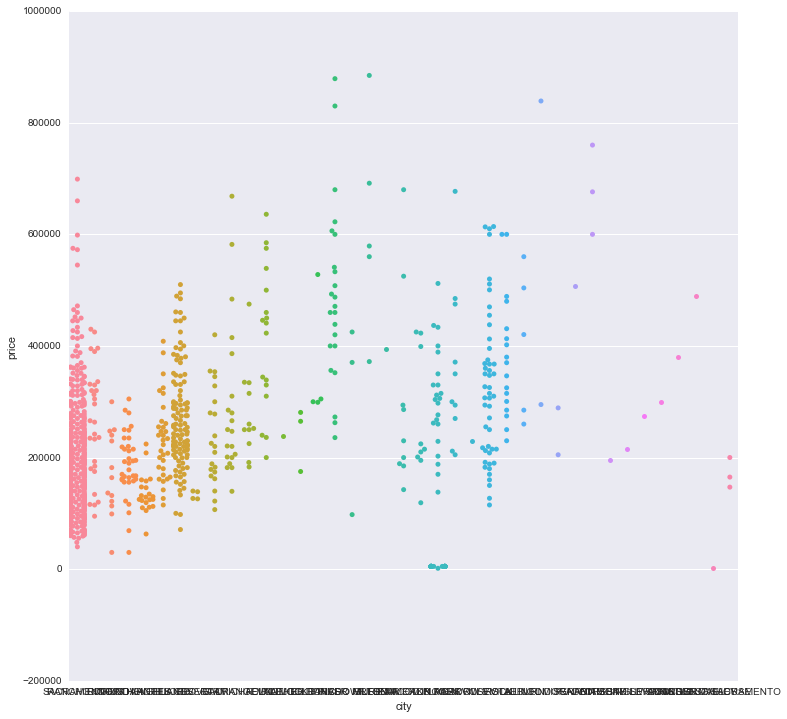

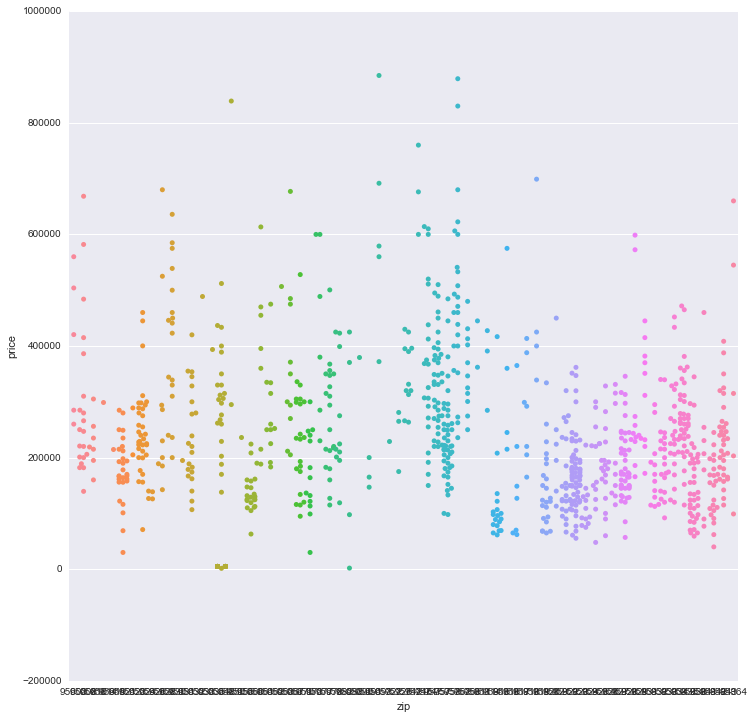

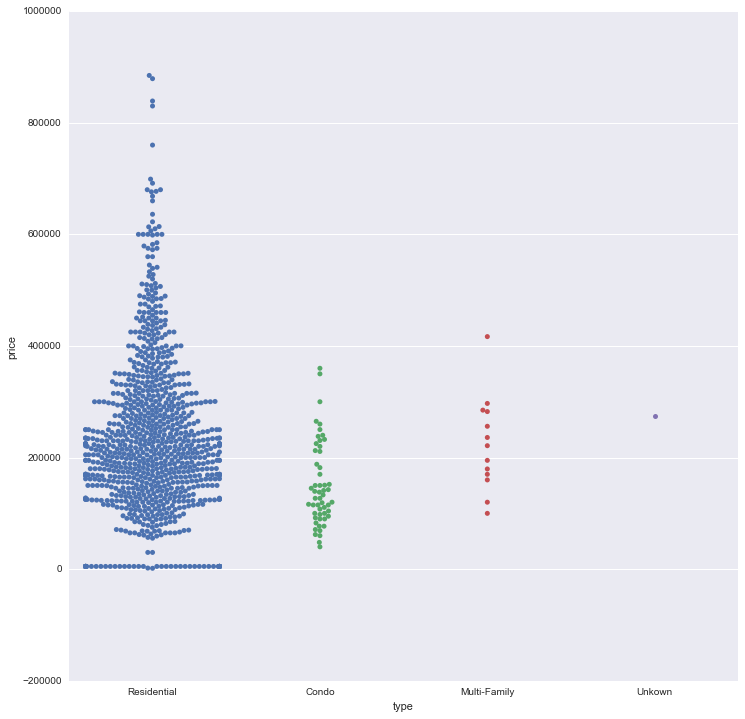

In [55]:
# For the categorical variables

for column in ["city2", "zip", "type"]:
    plt.figure(figsize=(12, 12))
    sns.swarmplot(x=column, y="price", data=data)
    sns.plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

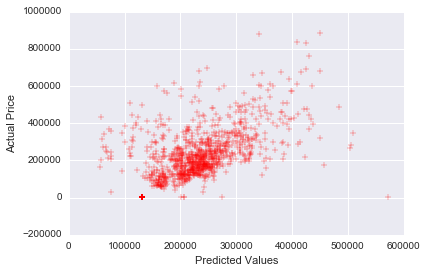

MSE: 13851905635.7


In [54]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error

X = data[["zip", "beds", "baths", "sq__ft", "latitude",'longitude']]
y = data["price"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Price")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?